In [ ]:
import pandas

In [ ]:
df = pandas.read_csv("./data.csv")

In [ ]:
df.head(3)

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,...,Depletion Income Statement,Duefrom Related Parties Non Current,Net Income From Tax Loss Carryforward,Net Income Extraordinary,Taxes Refund Paid,Current Deferred Taxes Liabilities,Securities Amortization,Restricted Common Stock,Dividend Paid Cfo,Interest Paid Cfo
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.2,0.3,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",11.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df['Address'] = df['Address'].str.split('\n', n=3).str[:3].str.join('\n')

In [ ]:
from geopy.geocoders import Nominatim
from tqdm import tqdm
import pandas as pd

# Initialize the geocoder
geolocator = Nominatim(user_agent="your_app_name")

# function to get coordinates from an address
def get_coordinates_lat(address):
  try:
    location = geolocator.geocode(address)
    if location:
        return location.latitude
    else:
        return None
  except:
    pass
def get_coordinates_long(address):
  try:
    location = geolocator.geocode(address)
    if location:
        return location.latitude
    else:
        return None
  except:
    pass

# df['Latitude'] = df['Address'].progress_apply(get_coordinates_lat)
# df['Longitude'] = df['Address'].progress_apply(get_coordinates_long)

In [ ]:
df

,Symbol,Name,Address,Sector,Industry,Full Time Employees,Description,Total ESG Risk score,Environment Risk Score,Governance Risk Score,...,Depletion Income Statement,Duefrom Related Parties Non Current,Net Income From Tax Loss Carryforward,Net Income Extraordinary,Taxes Refund Paid,Current Deferred Taxes Liabilities,Securities Amortization,Restricted Common Stock,Dividend Paid Cfo,Interest Paid Cfo
0,A,Agilent Technologies Inc,"5301 Stevens Creek Boulevard\nSanta Clara, CA ...",Healthcare,Diagnostics & Research,"18,000","Agilent Technologies, Inc. provides applicatio...",15.2,0.3,6.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAL,American Airlines Group Inc,"1 Skyview Drive\nFort Worth, TX 76155\nUnited ...",Industrials,Airlines,"132,500","American Airlines Group Inc., through its subs...",29.0,12.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAP,Advance Auto Parts Inc,"4200 Six Forks Road\nRaleigh, NC 27609\nUnited...",Consumer Cyclical,Specialty Retail,"40,000","Advance Auto Parts, Inc. provides automotive r...",11.0,0.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAPL,Apple Inc,"One Apple Park Way\nCupertino, CA 95014\nUnite...",Technology,Consumer Electronics,"164,000","Apple Inc. designs, manufactures, and markets ...",16.7,0.6,9.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABBV,Abbvie Inc,"1 North Waukegan Road\nNorth Chicago, IL 60064...",Healthcare,Drug Manufacturers—General,"50,000","AbbVie Inc. discovers, develops, manufactures,...",27.8,1.1,9.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,YUM,Yum Brands Inc,"1441 Gardiner Lane\nLouisville, KY 40213\nUnit...",Consumer Cyclical,Restaurants,"36,000","Yum! Brands, Inc., together with its subsidiar...",20.5,4.5,4.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
497,ZBH,Zimmer Biomet Holdings Inc,"345 East Main Street\nWarsaw, IN 46580\nUnited...",Healthcare,Medical Devices,"18,000","Zimmer Biomet Holdings, Inc., together with it...",27.0,4.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,ZBRA,Zebra Technologies Corp Cl A,"3 Overlook Point\nLincolnshire, IL 60069\nUnit...",Technology,Communication Equipment,"10,500","Zebra Technologies Corporation, together with ...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,ZION,Zions Bancorp Na,"One South Main Street\nSalt Lake City, UT 8413...",Financial Services,Banks—Regional,"10,103","Zions Bancorporation, National Association pro...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# df['Location'] = lat_lon_to_vector(df["Latitude"], df["Longitude"])

In [ ]:
# creating all needed elements for calculating ESG
df['ROE'] = df['Net Income'] / (df['Total Assets']- df['Total Liabilities Net Minority Interest'])
df['Current Ratio'] = df['Current Assets']/df['Current Liabilities']
df['Debt Coverage Ratio'] = df['Long Term Debt']/df['Net Income']
df ['EPS'] = df['Net Income']/df['Share Issued']
df['Net Profit Margin'] = df['Net Income']/df['Total Revenue']
# df['Current Ratio'] = df['Current Assets']/df['Current Liabilities']
df['Long Term Debt Net Income'] = df['Long Term Debt']/df['Net Income']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
import pandas as pd

In [ ]:
import numpy as np

# add more features and see if it improves the accuracy of the model
columns_to_keep = ["Total ESG Risk score", "ROE", "Current Ratio", "Debt Coverage Ratio", "EPS", "Free Cash Flow", "Operating Cash Flow", "Industry", "Net Profit Margin", "Long Term Debt Net Income"]

df = df[columns_to_keep]

df = df.dropna()

df = df.replace([np.inf, -np.inf], np.nan).dropna()

X = df.drop("Total ESG Risk score", axis=1)
y = df["Total ESG Risk score"]

In [ ]:
df

,Total ESG Risk score,ROE,Current Ratio,Debt Coverage Ratio,EPS,Free Cash Flow,Operating Cash Flow,Industry,Net Profit Margin,Long Term Debt Net Income
0,15.2,0.212147,2.611354,2.205645,4.244784,1.474000e+09,1.772000e+09,Diagnostics & Research,0.181472,2.205645
1,29.0,-0.158016,0.615175,35.608273,1.256356,1.207000e+09,3.803000e+09,Airlines,0.015572,35.608273
2,11.0,0.011801,1.201533,60.076038,0.384426,4.496400e+07,2.873750e+08,Specialty Retail,0.002634,60.076038
3,16.7,1.560760,0.988012,0.982329,6.237596,9.958400e+10,1.105430e+11,Consumer Electronics,0.253062,0.982329
4,27.8,0.467731,0.872123,10.732881,2.667513,2.206200e+10,2.283900e+10,Drug Manufacturers—General,0.089528,10.732881
...,...,...,...,...,...,...,...,...,...,...
494,16.0,-0.040073,1.384561,-13.606061,-0.623229,2.280000e+08,3.770000e+08,Medical Instruments & Supplies,-0.033291,-13.606061
495,16.0,0.059847,1.761451,3.724138,2.364130,5.660000e+08,8.370000e+08,Specialty Industrial Machinery,0.082700,3.724138
496,20.5,-0.203232,1.259984,6.950532,5.683274,1.318000e+09,1.603000e+09,Restaurants,0.225692,6.950532
497,27.0,0.081998,1.613180,4.895117,3.238457,1.204100e+09,1.581600e+09,Medical Devices,0.138487,4.895117


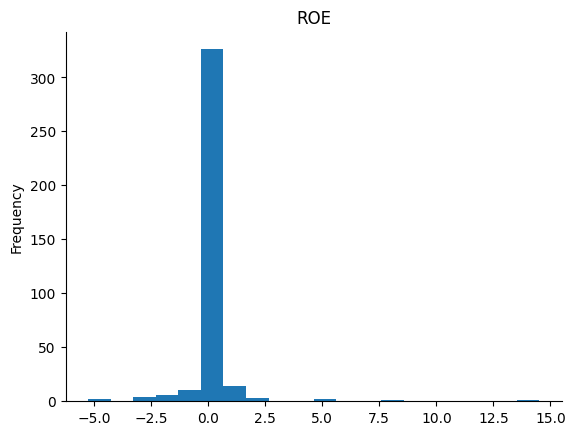

In [ ]:
# @title ROE

from matplotlib import pyplot as plt
df['ROE'].plot(kind='hist', bins=20, title='ROE')
plt.gca().spines[['top', 'right',]].set_visible(False)





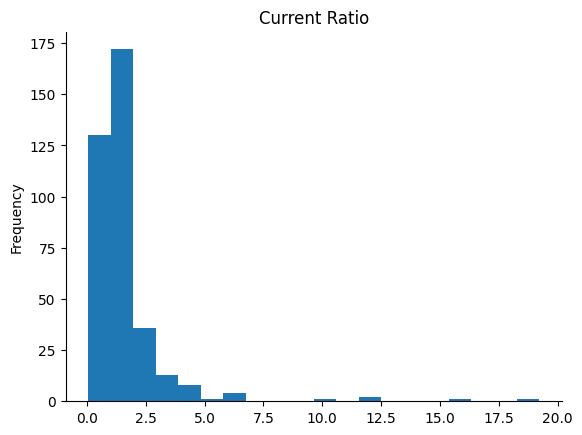

In [ ]:

from matplotlib import pyplot as plt
df['Current Ratio'].plot(kind='hist', bins=20, title='Current Ratio')
plt.gca().spines[['top', 'right',]].set_visible(False)

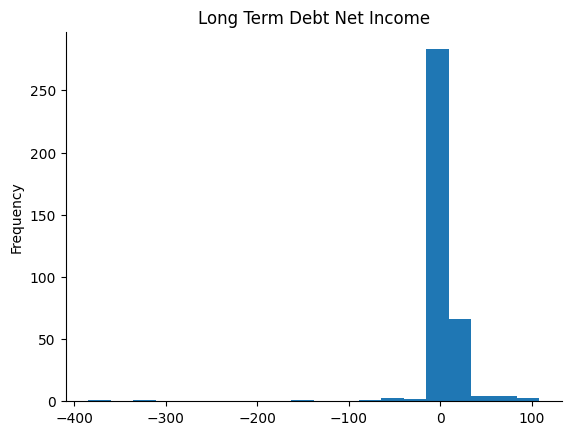

In [ ]:

from matplotlib import pyplot as plt
df['Long Term Debt Net Income'].plot(kind='hist', bins=20, title='Long Term Debt Net Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

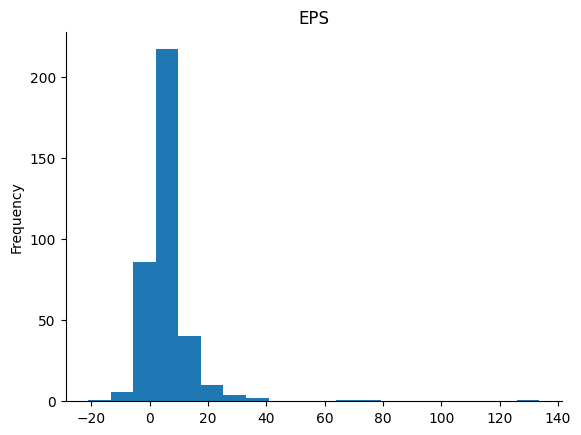

In [ ]:
from matplotlib import pyplot as plt
df['EPS'].plot(kind='hist', bins=20, title='EPS')
plt.gca().spines[['top', 'right',]].set_visible(False)

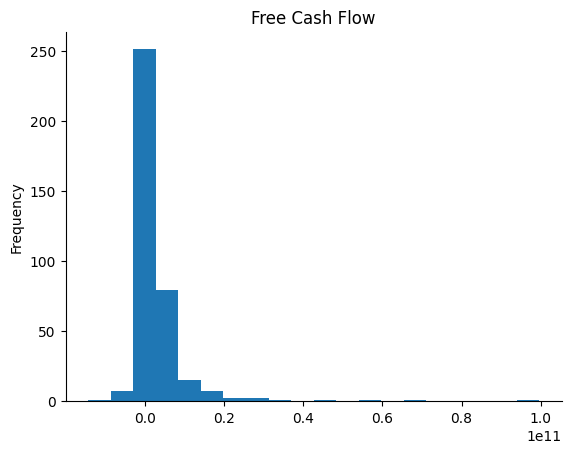

In [ ]:
from matplotlib import pyplot as plt
df['Free Cash Flow'].plot(kind='hist', bins=20, title='Free Cash Flow')
plt.gca().spines[['top', 'right',]].set_visible(False)

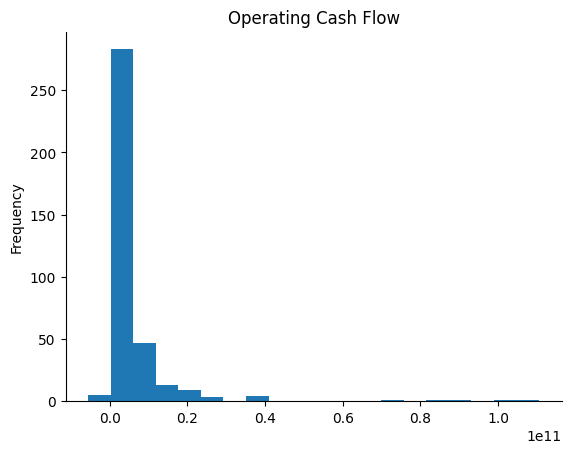

In [ ]:
from matplotlib import pyplot as plt
df['Operating Cash Flow'].plot(kind='hist', bins=20, title='Operating Cash Flow')
plt.gca().spines[['top', 'right',]].set_visible(False)

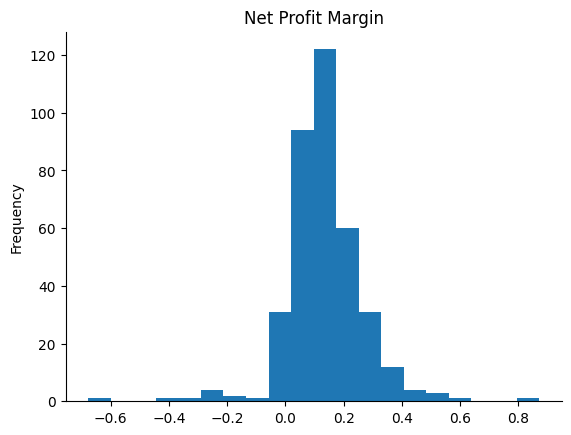

In [ ]:

from matplotlib import pyplot as plt
df['Net Profit Margin'].plot(kind='hist', bins=20, title='Net Profit Margin')
plt.gca().spines[['top', 'right',]].set_visible(False)

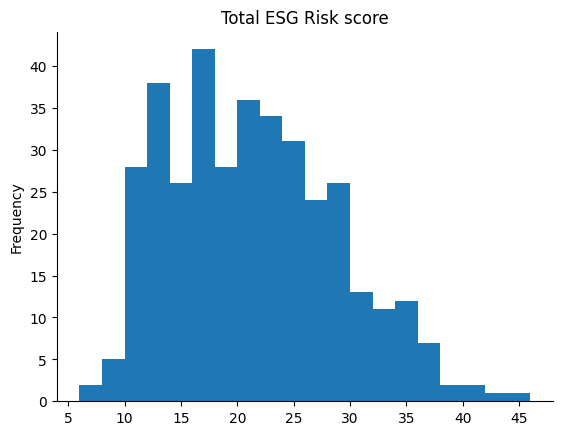

In [ ]:
# @title Total ESG Risk score

from matplotlib import pyplot as plt
df['Total ESG Risk score'].plot(kind='hist', bins=20, title='Total ESG Risk score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# MLP Regressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neural_network import MLPRegressor
import pandas as pd


X = df[["ROE", "Current Ratio", "Debt Coverage Ratio", "EPS", "Free Cash Flow", "Operating Cash Flow", "Net Profit Margin", "Long Term Debt Net Income"]]
y = df["Total ESG Risk score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MLPRegressorModel = MLPRegressor(hidden_layer_sizes=(9, 45), max_iter=100, random_state=42)

MLPRegressorModel.max_iter = 200  # Change the number of epochs

MLPRegressorModel.fit(X_train_scaled, y_train)

y_pred = MLPRegressorModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MLP): {mse}")



r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error (MLP): 37.247930932120404
R^2 Score: -0.6861897207840841


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
!pip install elm

  Using cached elm-0.1.3-py2.py3-none-any.whl (19 kB)
  Using cached numpy-1.15.4.zip (4.5 MB)
  Preparing metadata (setup.py) ... done
  Using cached deap-1.2.2.tar.gz (936 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
X

,ROE,Current Ratio,Debt Coverage Ratio,EPS,Free Cash Flow,Operating Cash Flow,Net Profit Margin,Long Term Debt Net Income
0,0.212147,2.611354,2.205645,0.181472,1.474000e+09,1.772000e+09,0.181472,2.205645
1,-0.158016,0.615175,35.608273,0.015572,1.207000e+09,3.803000e+09,0.015572,35.608273
2,0.011801,1.201533,60.076038,0.002634,4.496400e+07,2.873750e+08,0.002634,60.076038
3,1.560760,0.988012,0.982329,0.253062,9.958400e+10,1.105430e+11,0.253062,0.982329
4,0.467731,0.872123,10.732881,0.089528,2.206200e+10,2.283900e+10,0.089528,10.732881
...,...,...,...,...,...,...,...,...
494,-0.040073,1.384561,-13.606061,-0.033291,2.280000e+08,3.770000e+08,-0.033291,-13.606061
495,0.059847,1.761451,3.724138,0.082700,5.660000e+08,8.370000e+08,0.082700,3.724138
496,-0.203232,1.259984,6.950532,0.225692,1.318000e+09,1.603000e+09,0.225692,6.950532
497,0.081998,1.613180,4.895117,0.138487,1.204100e+09,1.581600e+09,0.138487,4.895117


In [ ]:
# Extreme Learning Machine (ELM)
from sklearn.neural_network import MLPRegressor


# XGBoost
from xgboost import XGBRegressor

# Remove duplicate column
unique_cols = X.columns.drop_duplicates()
X_train_unique = X_train[unique_cols]
X_test_unique = X_test[unique_cols]

# Train the XGBoost model
XGBModel = XGBRegressor(random_state=42)
XGBModel.fit(X_train_unique, y_train)
y_pred = XGBModel.predict(X_test_unique)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (XGBoost): {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score (XGBoost): {r2}")

# Support Vector Machine (SVM)
from sklearn.svm import SVR

SVMModel = SVR()
SVMModel.fit(X_train_scaled, y_train)
y_pred = SVMModel.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (SVM): {mse}")
r2 = r2_score(y_test, y_pred)
print(f"R^2 Score (SVM): {r2}")

Mean Squared Error (XGBoost): 85.422751739335
R^2 Score (XGBoost): -2.8670326726724773
Mean Squared Error (SVM): 43.29450110554094
R^2 Score (SVM): -0.9599140382770917


In [ ]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LinearRegressionModel = LinearRegression()

LinearRegressionModel.fit(X_train_scaled, y_train)

y_pred = LinearRegressionModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Linear): {mse}")


r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error (Linear): 36.71315868471594
R^2 Score: -0.6619809273298305


In [ ]:
# Lasso Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LassoModel = Lasso()

LassoModel.fit(X_train_scaled, y_train)

y_pred = LassoModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Lasso): {mse}")


r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error (Lasso): 36.808826333256604
R^2 Score: -0.6663117398486471


In [ ]:
# Ridge Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

RidgeModel = Ridge()

RidgeModel.fit(X_train_scaled, y_train)

y_pred = RidgeModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 36.35809488880443
R^2 Score: -0.6459074191400833


In [ ]:
# Elastic Net Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ElasticNetModel = Ridge()

ElasticNetModel.fit(X_train_scaled, y_train)

y_pred = ElasticNetModel.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2}")

Mean Squared Error: 36.35809488880443
R^2 Score: -0.6459074191400833


In [ ]:
selected_index = 89
new_data = X.iloc[[selected_index]]

new_data_scaled = scaler.transform(new_data)

predicted_score_linear = LinearRegressionModel.predict(new_data_scaled)
predicted_score_mlp = MLPRegressorModel.predict(new_data_scaled)
predicted_score_lasso = LassoModel.predict(new_data_scaled)
predicted_score_ridge = RidgeModel.predict(new_data_scaled)
predicted_score_elasticnet = RidgeModel.predict(new_data_scaled)



actual_score = y.iloc[selected_index]

print(f"Predicted ESG Risk Score for index (MLP) {selected_index}: {predicted_score_mlp[0]}")
print(f"Predicted ESG Risk Score for index (Linear) {selected_index}: {predicted_score_linear[0]}")
print(f"Predicted ESG Risk Score for index (Lasso) {selected_index}: {predicted_score_lasso[0]}")
print(f"Predicted ESG Risk Score for index (Ridge) {selected_index}: {predicted_score_ridge[0]}")
print(f"Predicted ESG Risk Score for index (Elastic Net) {selected_index}: {predicted_score_elasticnet[0]}")

print(f"Actual ESG Risk Score for index {selected_index}: {actual_score}")


Predicted ESG Risk Score for index (MLP) 89: 12.036058197512608
Predicted ESG Risk Score for index (Linear) 89: 21.50448787803546
Predicted ESG Risk Score for index (Lasso) 89: 21.53651226158038
Predicted ESG Risk Score for index (Ridge) 89: 20.377451844989345
Predicted ESG Risk Score for index (Elastic Net) 89: 20.377451844989345
Actual ESG Risk Score for index 89: 22.8


In [ ]:
df

,Total ESG Risk score,ROE,Current Ratio,Debt Coverage Ratio,EPS,Free Cash Flow,Operating Cash Flow,Industry,Net Profit Margin,Long Term Debt Net Income
0,15.2,0.212147,2.611354,2.205645,0.181472,1.474000e+09,1.772000e+09,Diagnostics & Research,0.181472,2.205645
1,29.0,-0.158016,0.615175,35.608273,0.015572,1.207000e+09,3.803000e+09,Airlines,0.015572,35.608273
2,11.0,0.011801,1.201533,60.076038,0.002634,4.496400e+07,2.873750e+08,Specialty Retail,0.002634,60.076038
3,16.7,1.560760,0.988012,0.982329,0.253062,9.958400e+10,1.105430e+11,Consumer Electronics,0.253062,0.982329
4,27.8,0.467731,0.872123,10.732881,0.089528,2.206200e+10,2.283900e+10,Drug Manufacturers—General,0.089528,10.732881
...,...,...,...,...,...,...,...,...,...,...
494,16.0,-0.040073,1.384561,-13.606061,-0.033291,2.280000e+08,3.770000e+08,Medical Instruments & Supplies,-0.033291,-13.606061
495,16.0,0.059847,1.761451,3.724138,0.082700,5.660000e+08,8.370000e+08,Specialty Industrial Machinery,0.082700,3.724138
496,20.5,-0.203232,1.259984,6.950532,0.225692,1.318000e+09,1.603000e+09,Restaurants,0.225692,6.950532
497,27.0,0.081998,1.613180,4.895117,0.138487,1.204100e+09,1.581600e+09,Medical Devices,0.138487,4.895117


In [ ]:
var1 = "Long Term Debt Net Income"
var2 = "Total ESG Risk score"

R-squared value: 9.352745415683294e-05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


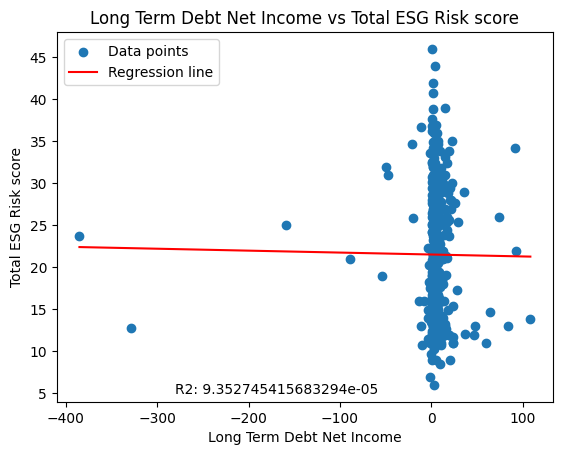

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import linregress

plt.scatter(df[var1], df[var2], label="Data points")
plt.title(f"{var1} vs {var2}")
plt.xlabel(var1)
plt.ylabel(var2)

model = LinearRegression()
model.fit(df[[var1]], df[var2])

x_values = np.linspace(df[var1].min(), df[var1].max(), 100)
y_values = model.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, color='red', label="Regression line")

slope, intercept, r_value, p_value, std_err = linregress(df[var1], df[var2])
r_squared = r_value**2
print(f'R-squared value: {r_squared}')

# Display the plot
plt.text( -280, 5,f'R2: {r_squared}')
plt.legend()
plt.show()

Feature: ROE, Score: -0.11318
Feature: Current Ratio, Score: 0.06762
Feature: Debt Coverage Ratio, Score: -0.00302
Feature: EPS, Score: 0.00924
Feature: Free Cash Flow, Score: -0.00000
Feature: Operating Cash Flow, Score: 0.00000
Feature: Net Profit Margin, Score: 2.82435
Feature: Current Ratio, Score: 0.06762
Feature: Long Term Debt Net Income, Score: -0.00302


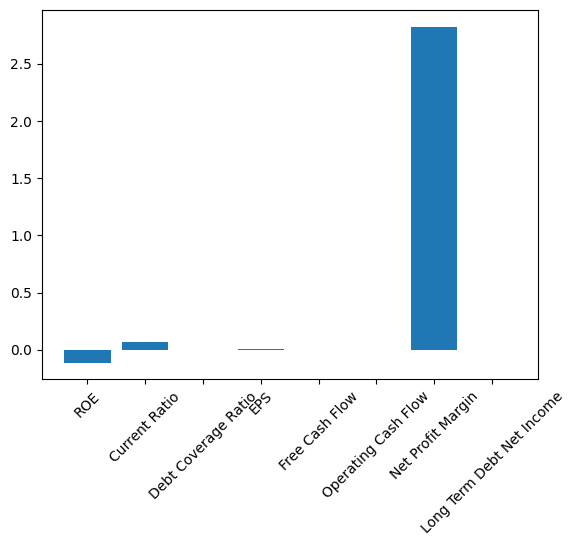

In [ ]:
# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.emb
from matplotlib import pyplot

# define dataset
X = df[["ROE", "Current Ratio", "Debt Coverage Ratio", "EPS", "Free Cash Flow", "Operating Cash Flow", "Net Profit Margin", "Current Ratio", "Long Term Debt Net Income"]]
y = df["Total ESG Risk score"]

# define the model
model = LinearRegression()

# fit the model
model.fit(X, y)

# get feature names
feature_names = X.columns

# get importance
importance = model.coef_

# summarize feature importance
for feature, score in zip(feature_names, importance):
    print('Feature: {}, Score: {:.5f}'.format(feature, score))

# plot feature importance
pyplot.bar(feature_names, importance)
pyplot.xticks(rotation=45)
pyplot.show()
